In [1]:
import numpy as np
import pickle as pk
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ensemble_idxs = [1, 2, 4, 5]
ensemble_losses = []
for idx in ensemble_idxs:
    with open(f'/workspaces/pyskl/work_dirs/losses/{idx}.json', 'rb') as f:
        context = json.load(f)
        ensemble_losses.append(context)

In [3]:
print(ensemble_losses[0][0])
print(ensemble_losses[0][10])

{'mode': 'train', 'epoch': 1, 'iter': 1, 'lr': 0.075, 'memory': 2500, 'data_time': 9.42469, 'top1_acc': 0.19792, 'top5_acc': 1.0, 'loss_cls': 1.64365, 'loss': 1.64365, 'time': 10.99772}
{'mode': 'train', 'epoch': 1, 'iter': 11, 'lr': 0.07498, 'memory': 2525, 'data_time': 0.02472, 'top1_acc': 0.35417, 'top5_acc': 1.0, 'loss_cls': 1.47558, 'loss': 1.47558, 'time': 0.05958}


In [4]:
infos = []

for idx in range(len(ensemble_idxs)):
    info = {}
    lr = []
    loss = []
    top1 = []
    top5 = []
    top1_val = []
    top5_val = []
    for iter in ensemble_losses[idx]:
        if iter['mode'] == 'train':
            lr.append(iter['lr'])
            loss.append(iter['loss'])
            top1.append(iter['top1_acc'])
            top5.append(iter['top5_acc'])
        if iter['mode'] == 'val':
            top1_val.append(iter['top1_acc'])
            top5_val.append(iter['top5_acc'])
    
    info['lr'] = lr
    info['loss'] = loss
    info['top1'] = top1
    info['top5'] = top5
    info['top1_val'] = top1_val
    info['top5_val'] = top5_val
    
    infos.append(info)        

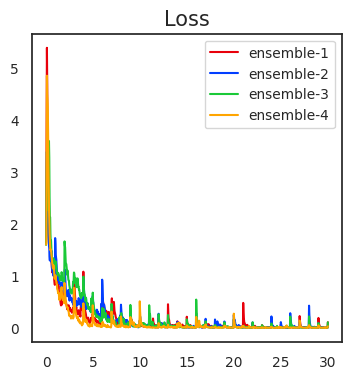

In [5]:
# print(infos[0]['loss'])

iters = 1/32 * np.array([iter for iter in range(len(infos[0]['loss']))])
color_map = ['r', 'b', 'g', 'orange']
line_map = ['-', '-', '-', '-']

plt.figure(figsize=(4, 4))  # Set the figure size
sns.set(style="white", font_scale=0.9)  # Set the style
# {deep, muted, pastel, dark, bright, colorblind}
sns.set_color_codes(palette='bright')
plt.title('Loss', fontsize=15)
# plt.tick_params(pad = 0.00)

for idx in range(len(ensemble_idxs)):
    
    # tensorboard的loss平滑
    weight = 0.6
    last = infos[idx]['loss'][0]
    smoothed = []
    for point in infos[idx]['loss']:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val


    sns.lineplot(x=iters, y=smoothed, linestyle=line_map[idx], color=color_map[idx], label=f"ensemble-{idx+1}")
plt.savefig('/workspaces/pyskl/workspace/notebooks/loss.svg', bbox_inches = 'tight')

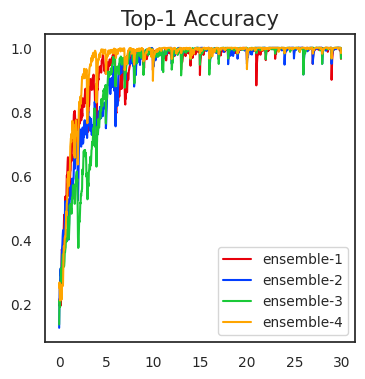

In [6]:
iters = 1/32 * np.array([iter for iter in range(len(infos[0]['top1']))])
color_map = ['r', 'b', 'g', 'orange']
line_map = ['-', '-', '-', '-']

plt.figure(figsize=(4, 4))  # Set the figure size
sns.set(style="white",font_scale=0.9)  # Set the style
# {deep, muted, pastel, dark, bright, colorblind}
sns.set_color_codes(palette='bright')
plt.title('Top-1 Accuracy', fontsize=15)
# plt.tick_params(pad = 0.00)

for idx in range(len(ensemble_idxs)):
    
    # tensorboard的loss平滑
    weight = 0.6
    last = infos[idx]['top1'][0]
    smoothed = []
    for point in infos[idx]['top1']:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    sns.lineplot(x=iters, y=smoothed, linestyle=line_map[idx], color=color_map[idx], label=f"ensemble-{idx+1}")
plt.savefig('/workspaces/pyskl/workspace/notebooks/accuracy.svg', bbox_inches = 'tight')

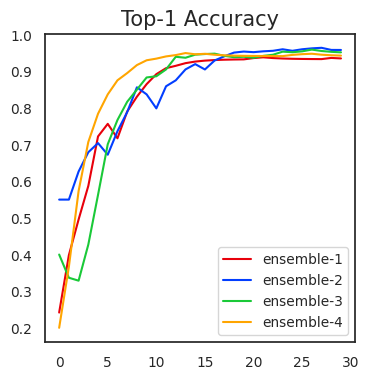

In [7]:
iters = [iter for iter in range(len(infos[0]['top1_val']))]
color_map = ['r', 'b', 'g', 'orange']
line_map = ['-', '-', '-', '-']

plt.figure(figsize=(4, 4))  # Set the figure size
sns.set(style="white",font_scale=0.9)  # Set the style
# {deep, muted, pastel, dark, bright, colorblind}
sns.set_color_codes(palette='bright')
plt.title('Top-1 Accuracy', fontsize=15)
# plt.tick_params(pad = 0.00)

for idx in range(len(ensemble_idxs)):
    
    # tensorboard的loss平滑
    weight = 0.6
    last = infos[idx]['top1_val'][0]
    smoothed = []
    for point in infos[idx]['top1_val']:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    sns.lineplot(x=iters, y=smoothed, linestyle=line_map[idx], color=color_map[idx], label=f"ensemble-{idx+1}")
plt.savefig('/workspaces/pyskl/workspace/notebooks/eval-accuracy.svg', bbox_inches = 'tight')

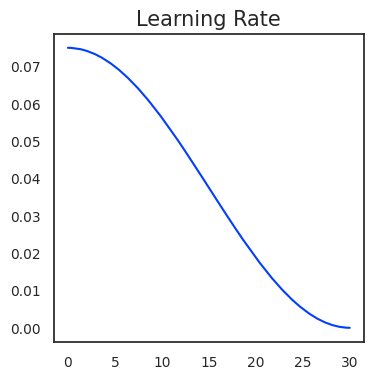

In [8]:
iters = 1/32 * np.array([iter for iter in range(len(infos[0]['lr']))])
color_map = ['r', 'b', 'r', 'b']
line_map = ['-', '-', '-', '-']

plt.figure(figsize=(4, 4))  # Set the figure size
sns.set(style="white",font_scale=0.9)  # Set the style
sns.set_color_codes(palette='bright')
plt.title('Learning Rate', fontsize=15)

for idx in range(1):
    
    lr = infos[idx]['lr']
    # {deep, muted, pastel, dark, bright, colorblind}
    sns.lineplot(x=iters, y=lr, linestyle=line_map[idx], color=color_map[1])
plt.savefig('/workspaces/pyskl/workspace/notebooks/learning_rate.svg', bbox_inches = 'tight')